# Daily Challenge: Global Power Plants

In [ ]:
# 1. Data Import and Cleaning

import numpy as np
import pandas as pd

data = pd.read_csv('/content/global_power_plant_database.csv')

# Dropping previously identified unnecessary columns
columns_to_drop = ['other_fuel2', 'other_fuel3', 'owner', 'wepp_id', 'generation_data_source']
data_cleaned = data.drop(columns=columns_to_drop)

# Missing values for numerical columns (median)
data_cleaned[data_cleaned.select_dtypes(include=['float64', 'int64']).columns] = \
    data_cleaned.select_dtypes(include=['float64', 'int64']).transform(lambda x: x.fillna(x.median()))

# Missing values for categorical columns (mode)
data_cleaned[data_cleaned.select_dtypes(include=['object']).columns] = \
    data_cleaned.select_dtypes(include=['object']).transform(lambda x: x.fillna(x.mode()[0]))

# Checking the result of the cleaning
remaining_missing_values_cleaned = data_cleaned.isnull().sum()
remaining_missing_values_cleaned[remaining_missing_values_cleaned > 0]  # Verifying that no missing values remain


<ipython-input-1-116b1741e1a4>:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/global_power_plant_database.csv')


,0


In [ ]:
# 2. Exploratory Data Analysis

# Summary statistics for numerical columns
summary_stats = data_cleaned.describe()

print(summary_stats)

# Distribution of power plants by country and fuel type
plants_by_country = data_cleaned['country'].value_counts()
plants_by_fuel = data_cleaned['primary_fuel'].value_counts()

plants_by_country.head(), plants_by_fuel.head()


        capacity_mw      latitude     longitude  commissioning_year  \
count  34936.000000  34936.000000  34936.000000        34936.000000   
mean     163.355148     32.816637     -6.972803         2002.213173   
std      489.636072     22.638603     78.405850           17.215166   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        4.900000     29.256475    -77.641550         2007.000000   
50%       16.745000     39.727750     -2.127100         2007.000000   
75%       75.344250     46.263125     49.502675         2007.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count           34936.000000         34936.000000         34936.000000   
mean             2018.667134           127.988808           154.588104   
std                 1.117514           957.739058          1046.708882   
min              2000.000000          -947.600000          -989.

(country
 USA    9833
 CHN    4235
 GBR    2751
 BRA    2360
 FRA    2155
 Name: count, dtype: int64,
 primary_fuel
 Solar    10665
 Hydro     7156
 Wind      5344
 Gas       3998
 Coal      2330
 Name: count, dtype: int64)

In [ ]:
# 3. Statistical Analysis

# Statistical analysis of power output by fuel type
fuel_type_stats = data_cleaned.groupby('primary_fuel')['capacity_mw'].agg(['mean', 'median', 'std'])

print("Fuel Type Capacity Statistics", )
fuel_type_stats

Fuel Type Capacity Statistics


,mean,median,std
primary_fuel,,,
Biomass,23.972938,9.45000,39.461805
Coal,843.579828,600.00000,888.187187
Cogeneration,98.731707,31.90000,283.428252
Gas,373.449375,147.50000,560.934146
Geothermal,67.130952,30.00000,114.640890
Hydro,147.171551,20.00000,549.809328
Nuclear,2091.855179,1888.00000,1303.509273
Oil,112.878754,9.00000,392.009039
Other,84.020000,40.00000,145.891392


<Figure size 1000x600 with 0 Axes>

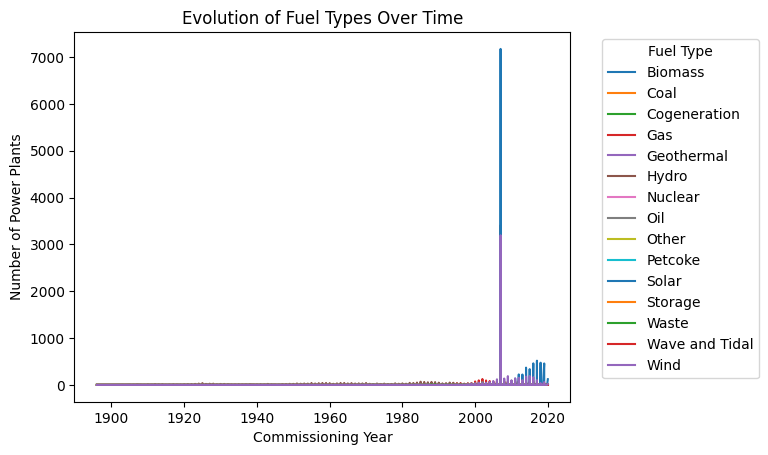

In [ ]:
# Time Series Analysis

fuel_over_time = data_cleaned.groupby(['commissioning_year', 'primary_fuel']).size().unstack(fill_value=0)

# Evolution of fuel types over time

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
fuel_over_time.plot(kind='line', stacked=False, title="Evolution of Fuel Types Over Time")
plt.ylabel('Number of Power Plants')
plt.xlabel('Commissioning Year')
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

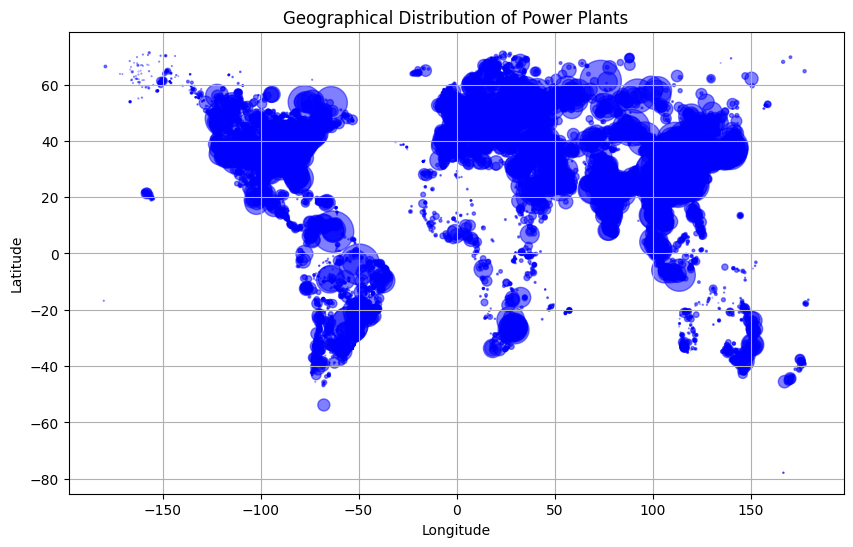

In [ ]:
# 5. Advanced Visualization

# geographical distribution of power plants

plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['longitude'], data_cleaned['latitude'], c='blue', alpha=0.5, s=data_cleaned['capacity_mw'] / 10)
plt.title('Geographical Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [ ]:
# 6. Matrix Operations in Real-World Context

# Analyze relationships between numerical variables
numeric_columns = ['capacity_mw', 'latitude', 'longitude']
correlation_matrix = data_cleaned[numeric_columns].corr()

correlation_matrix

,capacity_mw,latitude,longitude
capacity_mw,1.000000,-0.013218,0.151525
latitude,-0.013218,1.000000,-0.068354
longitude,0.151525,-0.068354,1.000000


# Introduction to SciPy


In [ ]:
!pip install scipy

In [ ]:
import numpy as np
from scipy import integrate

# Define a simple function
def integrand(x):
    return x**2

# Compute the integral of the function
result, _ = integrate.quad(integrand, 0, 1)
print("Integral of x^2 from 0 to 1:", result)

Integral of x^2 from 0 to 1: 0.33333333333333337


## Exercise: Compare NumPy and SciPy

In [ ]:
# 1. Use NumPy to create a large random array of floating-point numbers.

import numpy as np

large_array = np.random.rand(100000)

# 2.1 Compute the mean and standard deviation using Numpy

mean_np = np.mean(large_array)
std_np = np.std(large_array)

print("Mean (NumPy):", mean_np)
print("Standard Deviation (NumPy):", std_np)


Mean (NumPy): 0.4994812103202316
Standard Deviation (NumPy): 0.28839160160133903


In [ ]:
 # 2.2 Compute the mean and standard deviation using Scipy

import scipy.stats as stats

mean_scipy = stats.tmean(large_array)
std_scipy = stats.tstd(large_array)

print("Mean (SciPy):", mean_scipy)
print("Standard Deviation (SciPy):", std_scipy)


Mean (SciPy): 0.4994812103202316
Standard Deviation (SciPy): 0.2883930435701618


In [ ]:
# 3. Compare the results and execution time to understand the efficiency or additional features provided by SciPy.

# SciPy is more accurate but NumPy is faster

# Basic Statistical functions

In [ ]:
# Using NumPy

import numpy as np

daily_steps = np.random.randint(3000, 10000, size=50)

mean_np = np.mean(daily_steps)
median_np = np.median(daily_steps)
variance_np = np.var(daily_steps)
std_dev_np = np.std(daily_steps)

In [ ]:
import scipy.stats as stats

mean_scipy = stats.tmean(daily_steps)
median_scipy = np.median(daily_steps)  # SciPy does not have a separate median function
variance_scipy = stats.tvar(daily_steps)
std_dev_scipy = stats.tstd(daily_steps)

## Advanced Statistics with SciPy

In [ ]:
skewness = stats.skew(daily_steps)
kurtosis = stats.kurtosis(daily_steps)

In [ ]:
print(skewness)
print(kurtosis)

-0.18269007361665246
-1.2848424449517961


## Exercise: Analyzing a Real-World Dataset



In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

data = {
    'Date' : ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'DVLPRS_price' : [117.64, 104.00, 109.79, 122.41, 118.68]
        }

df = pd.DataFrame(data)

df.head()


,Date,DVLPRS_price
0,2023-01-01,117.64
1,2023-01-02,104.00
2,2023-01-03,109.79
3,2023-01-04,122.41
4,2023-01-05,118.68


In [ ]:
# Calculate the mean, median, variance, and standard deviation of the stock prices.

mean_price = np.mean(df['DVLPRS_price'])
median_price = np.median(df['DVLPRS_price'])
variance_price = np.var(df['DVLPRS_price'])
std_dev_price = np.std(df['DVLPRS_price'])

print("Mean Price:", mean_price)
print("Median Price:", median_price)
print("Variance Price:", variance_price)
print("Standard Deviation Price:", std_dev_price)



Mean Price: 114.50399999999999
Median Price: 117.64
Variance Price: 44.46682399999999
Standard Deviation Price: 6.668344922092737


In [ ]:
# 4. Interpret the results in the context of financial data analysis.

# The mean and the median are slightly different, which indicates that the distribution is fairly symmetrical.
# The standard deviation value suggests a reasonnable amount of variation in stock prices day-to-day.

# T-Test

## Exercise: Understanding T-testing

In [ ]:
# A new teaching method is implemented to improve students' test scores.

# 1. Formulate Hypothesis

# 1.1 Null Hypothesis: There is no statistical significance in test scores with the new method.
# 1.2 Alternative Hypothesis: There is a significant statistical difference in test scores.

# 2. Interpret Results: A T-test yields a T-statistic of 2.5 and a P-value of 0.015. Analyze its effectiveness.

# T-statistic: It indicates the difference between the 2 groups is 2.5 bigger than the expected variation by chance.
# p-value: a p-value of 0.015 is under our threshold of 0.05, meaning that the difference is statistically significant. So we can reject the null hypothesis.
# We can conclude that the new teaching method likely improved the students' test scores.

# 3. Discuss Implications: Consider factors for evaluating the method's practical significance.
# After seeing a statistical significance of the new method's impact, we should consider the practical importance of it to get the size of the effect, its magnitude.